<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (4)

### [실습1]

1) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일들을 불러와 **pop01, pop02, pop03** 데이터프레임을 만드세요. 
    - 단, read_csv() 함수 사용시  index_col='year' 옵션을 지정하세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv' 
- 1-3) 세 개의 데이터프레임을 outer 방식으로 연결해 pop 데이터프레임을 만드세요.
- 1-4) pop 데이터프레임 인덱스를 초기화 하세요. 단 기존 인덱스 값을 버리지 마세요. 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2) pop 데이터프레임 상위 10개 행을 확인하세요.

In [47]:
pop1= pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv',index_col = 'year')
pop2= pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv', index_col = 'year')
pop3= pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv', index_col = 'year')

pop = pd.concat([pop1,pop2,pop3],join='outer', axis=1)
pop.head(10)

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1981,4160,4191,NaN,NaN,1915,246
1982,4160,4191,NaN,NaN,2001,260
1983,4160,4191,NaN,NaN,2116,260
1984,4160,4191,NaN,NaN,2246,275
1985,4160,4191,7.0,6.0,2338,211
1986,4899,4888,7.0,5.0,2428,305
1987,5000,4979,6.0,5.0,2518,329
1988,5156,5120,5.0,5.0,2658,349
1989,5305,5261,6.0,5.0,2817,363


3) 결측치가 어느 정도 존재하는 지 확인하세요.

In [48]:
pop.isnull().sum()

k_male       0
k_female     0
f_male       4
f_female     4
household    0
older_65     0
dtype: int64

4) 모든 결측치는 뒤에 오는 값으로 채우세요.

In [49]:
pop['f_male'].fillna(method='bfill', inplace = True)
pop['f_female'].fillna(method='bfill', inplace = True)
pop.head()

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1981,4160,4191,7.0,6.0,1915,246
1982,4160,4191,7.0,6.0,2001,260
1983,4160,4191,7.0,6.0,2116,260
1984,4160,4191,7.0,6.0,2246,275
1985,4160,4191,7.0,6.0,2338,211


5) 결측치가 남아 있는지 확인하세요.

In [50]:
pop.isnull().sum()

k_male       0
k_female     0
f_male       0
f_female     0
household    0
older_65     0
dtype: int64

### [실습2]

1) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일들을 불러와 **pop01, pop02, pop03** 데이터프레임을 만드세요. 
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 1-3) 세 개의 데이터프레임을 inner 방식으로 **조인(merge)** 해 pop 데이터프레임을 만드세요.

In [51]:
pop1= pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv',index_col = 'year')
pop2= pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv', index_col = 'year')
pop3= pd.read_csv('https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv', index_col = 'year')

tmp = pd.merge(pop1, pop2, on='year', how='inner')
pop = pd.merge(tmp, pop3, on='year',how='inner')
pop.head(10)

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1985,4160,4191,7,6,2338,211
1986,4899,4888,7,5,2428,305
1987,5000,4979,6,5,2518,329
1988,5156,5120,5,5,2658,349
1989,5305,5261,6,5,2817,363
1990,5321,5282,5,4,2820,363
1991,5468,5405,18,14,3330,424
1992,5500,5435,19,16,3383,434
1993,5478,5412,19,17,3431,445


2) pop 데이터프레임 상위 10개 행을 확인하세요.

In [52]:
pop.head()

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1985,4160,4191,7,6,2338,211
1986,4899,4888,7,5,2428,305
1987,5000,4979,6,5,2518,329
1988,5156,5120,5,5,2658,349
1989,5305,5261,6,5,2817,363


## 3) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 3-1) 다음 공식에 따라 pop 데이터프레임에 k_total, f_total, male, female, total 열을 추가하세요.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 3-2) year, total, male, female 열만 추출해 pop_sum 데이터프레임을 선언하세요.
- 3-3) pop_sum 데이터프레임 상위 10개 행을 조회하세요.

## 3-1) 다음 공식에 따라 pop 데이터프레임에 k_total, f_total, male, female, total 열을 추가하세요.
- k_total = k_male + k_female
- f_total = f_male + f_female
- male = k_male + f_male
- female = k_female + f_female
- total = k_total + f_total

In [53]:
pop.head()

,k_male,k_female,f_male,f_female,household,older_65
year,,,,,,
1985,4160,4191,7,6,2338,211
1986,4899,4888,7,5,2428,305
1987,5000,4979,6,5,2518,329
1988,5156,5120,5,5,2658,349
1989,5305,5261,6,5,2817,363


In [54]:
pop['k_total'] = pop['k_male'] + pop['k_female']
pop['f_total'] = pop['f_male'] + pop['f_female']
pop['male'] = pop['k_male'] + pop['f_male']
pop['female'] = pop['k_female'] + pop['f_female']
pop['total'] = pop['k_total'] + pop['f_total']

In [55]:
# tmp = pd.merge(pop1, pop2, on='year', how='inner')
# pop = pd.merge(tmp, pop3, on='year',how='inner')

In [58]:
pop.head()

,k_male,k_female,f_male,f_female,household,older_65,k_total,f_total,male,female,total
year,,,,,,,,,,,
1985,4160,4191,7,6,2338,211,8351,13,4167,4197,8364
1986,4899,4888,7,5,2428,305,9787,12,4906,4893,9799
1987,5000,4979,6,5,2518,329,9979,11,5006,4984,9990
1988,5156,5120,5,5,2658,349,10276,10,5161,5125,10286
1989,5305,5261,6,5,2817,363,10566,11,5311,5266,10577


## 3-2) year, total, male, female 열만 추출해 pop_sum 데이터프레임을 선언하세요.

In [60]:
pop = pop.reset_index(drop=False)

In [63]:
pop_sum = pop[['year','total','male','female']]

In [65]:
pop_sum.head()

,year,total,male,female
0,1985,8364,4167,4197
1,1986,9799,4906,4893
2,1987,9990,5006,4984
3,1988,10286,5161,5125
4,1989,10577,5311,5266


## 3-3) pop_sum 데이터프레임 상위 10개 행을 조회하세요.

In [66]:
pop_sum.head(10)

,year,total,male,female
0,1985,8364,4167,4197
1,1986,9799,4906,4893
2,1987,9990,5006,4984
3,1988,10286,5161,5125
4,1989,10577,5311,5266
5,1990,10612,5326,5286
6,1991,10905,5486,5419
7,1992,10970,5519,5451
8,1993,10926,5497,5429
9,1994,10800,5430,5370


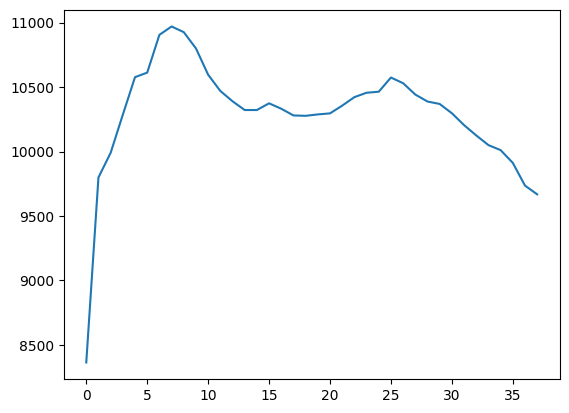

In [71]:
import matplotlib.pyplot as plt
plt.plot(pop_sum['total'])
plt.show()

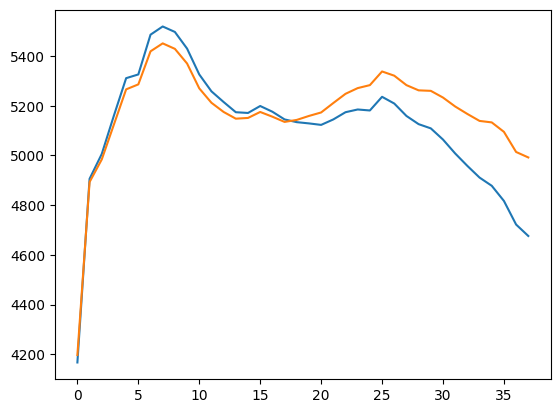

In [72]:
import matplotlib.pyplot as plt
plt.plot(pop_sum[['male','female']])
plt.show()